In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

df = pd.read_csv('Customer analysis.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [2]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.duplicated(subset='ID').sum()

0

In [6]:
df= df.dropna()

In [12]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [14]:
# change column type from object to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
df['Dt_Customer_month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_year'] = df['Dt_Customer'].dt.year

# Convert the datetime column to the number of seconds since the Unix Epoch
df['Dt_Customer_seconds'] = (df['Dt_Customer'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
df = df.drop(columns=['Dt_Customer'])

df = df[df['Year_Birth']>1940]

df.columns

def classify_age(year):
    if year <= 1964:
        return 'baby_boomer'
    elif year > 1964 and year < 1980:
        return 'generation_x'
    elif year >= 1980 and year < 1990:
        return 'millenial'
    else:
        return 'gen_z'

#classify group
df['age_group'] = df['Year_Birth'].apply(classify_age)

#sum amount columns
amount_columns = [column for column in df.columns if column.startswith('Mnt')]
df['sum_amount'] = df[amount_columns].sum(axis=1)

#sum trx columns
trx_columns = [column for column in df.columns if column.startswith('Num')]
df['count_trx'] = df[trx_columns].sum(axis=1)

In [15]:
gb_age = df.groupby('age_group').agg({'ID':'count'}).reset_index()
gb_age

,age_group,ID
0,baby_boomer,771
1,gen_z,61
2,generation_x,1022
3,millenial,358


In [16]:
fig = go.Figure(go.Treemap(
    labels = gb_age['age_group'],
    parents = [""] * len(gb_age),
    values = gb_age['ID'],
    texttemplate="%{label}<br>%{value}<br>%{percentParent:.2%},",
    marker=dict(colors=["yellow", "blackblue", "lightcoral", "lightgreen"]),  # Set lighter colors
    textfont=dict(size=19, color="black", family="Arial Black")
    # texttemplate="%{label}<br>%{value}<br>%{percentParent:.2f}%"
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

In [17]:
gb_m = df.groupby('Marital_Status').agg({'ID':'count'}).reset_index()
gb_m

,Marital_Status,ID
0,Absurd,2
1,Alone,3
2,Divorced,231
3,Married,857
4,Single,469
5,Together,572
6,Widow,76
7,YOLO,2


In [18]:
import plotly.graph_objects as go

fig = go.Figure(go.Treemap(
    labels = gb_m['Marital_Status'],
    parents = [""] * len(gb_m),
    values = gb_m['ID'],
    texttemplate="%{label}<br>%{value}<br>%{percentParent:.2%},",
    marker=dict(colors=["yellow", "blackblue", "lightcoral", "lightgreen"]),  # Set lighter colors
    textfont=dict(size=19, color="black", family="Arial Black")
    # texttemplate="%{label}<br>%{value}<br>%{percentParent:.2f}%"
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

In [19]:
min(df['Year_Birth'].unique())

1941

In [20]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_month,Dt_Customer_year,Dt_Customer_seconds,age_group,sum_amount,count_trx
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,3,11,1,9,2012,1346716800,baby_boomer,1617,32
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,3,11,0,3,2014,1394236800,baby_boomer,27,11
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,3,11,0,8,2013,1377043200,generation_x,776,25
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,3,11,0,2,2014,1391990400,millenial,53,14
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,3,11,0,1,2014,1390089600,millenial,422,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,0,3,11,0,6,2013,1371081600,generation_x,1341,23
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,0,3,11,0,6,2014,1402358400,baby_boomer,444,29
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,0,3,11,0,1,2014,1390608000,millenial,1241,25
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,...,0,3,11,0,1,2014,1390521600,baby_boomer,843,26


In [21]:
# Calculate RFM values
rfm_df = df[['ID', 'Recency', 'count_trx', 'sum_amount']].copy()
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Segmenting customers into quartiles
rfm_df['R_quartile'] = pd.qcut(rfm_df['Recency'], 4, ['4','3','2','1']) # Recency: lower quartile is better
rfm_df['F_quartile'] = pd.qcut(rfm_df['Frequency'], 4, ['1','2','3','4']) # Frequency: higher quartile is better
rfm_df['M_quartile'] = pd.qcut(rfm_df['Monetary'], 4, ['1','2','3','4']) # Monetary: higher quartile is better

# Combine RFM quartile values
rfm_df['RFM_Segment'] = rfm_df.R_quartile.astype(str) + rfm_df.F_quartile.astype(str) + rfm_df.M_quartile.astype(str)

rfm_df['R_quartile'] = rfm_df['R_quartile'].astype(int)
rfm_df['F_quartile'] = rfm_df['F_quartile'].astype(int)
rfm_df['M_quartile'] = rfm_df['M_quartile'].astype(int)

rfm_df['RFM_Score'] = rfm_df[['R_quartile', 'F_quartile', 'M_quartile']].sum(axis=1)

# You can now filter or segment customers based on the RFM_Segment or RFM_Score
def classify_rfm(row):
    R, F, M = row['R_quartile'], row['F_quartile'], row['M_quartile']
    
    if R == 4 and F == 4 and M == 4:
        return 'best cust'
    elif F == 4:
        return 'loyal cust'
    elif R == 4 and M == 4:
        return 'potential big spender'
    elif M == 4:
        return 'need attention big spender'
    elif R == 4:
        return 'recent customer'
    elif R == 1 and F == 1 and M == 1:
        return 'lost cheap customer'
    elif R == 1:
        return 'lost customer'
    else:
        return 'regular customer'

rfm_df['segment'] = rfm_df.apply(classify_rfm, axis=1)

In [22]:
df2= df.copy()
df2 = pd.merge(df, rfm_df[['CustomerID','R_quartile', 'F_quartile', 'M_quartile','RFM_Segment', 'RFM_Score','segment' ]], how='left', left_on = 'ID', right_on = 'CustomerID')

In [23]:
df2.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,age_group,sum_amount,count_trx,CustomerID,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score,segment
1985,3599,1970,Graduation,Married,63684.0,0,1,61,575,80,...,generation_x,1464,28,3599,2,4,4,244,10,loyal cust
2115,7124,1968,Graduation,Divorced,36997.0,1,1,72,43,4,...,generation_x,94,17,7124,2,2,2,222,6,regular customer
888,6404,1969,Graduation,Together,58917.0,1,2,10,151,7,...,generation_x,282,21,6404,4,3,2,432,9,recent customer
700,3619,1960,2n Cycle,Divorced,87305.0,0,0,19,345,25,...,baby_boomer,1152,19,3619,4,2,4,424,10,potential big spender
2095,7532,1980,Graduation,Married,43586.0,0,1,26,99,2,...,millenial,132,18,7532,3,2,2,322,7,regular customer


In [24]:
df2.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Dt_Customer_month,Dt_Customer_year,Dt_Customer_seconds,sum_amount,count_trx,CustomerID,R_quartile,F_quartile,M_quartile,RFM_Score
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5586.412749,1968.930380,52237.076854,0.442134,0.505877,48.986438,305.226492,26.335895,167.034810,37.652351,...,6.463382,2013.028029,1.373438e+09,607.225136,20.214286,5586.412749,2.512206,2.467450,2.495479,7.475136
std,3248.472930,11.686685,25184.285561,0.537004,0.544253,28.931145,337.364344,39.740972,224.251065,54.769810,...,3.491933,0.685926,1.749570e+07,602.548859,7.280775,3248.472930,1.115791,1.141435,1.120702,2.385281
min,0.000000,1941.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2012.000000,1.343606e+09,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,2814.750000,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,2013.000000,1.358294e+09,69.000000,14.000000,2814.750000,2.000000,1.000000,1.000000,6.000000
50%,5454.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,...,6.000000,2013.000000,1.373242e+09,397.000000,19.000000,5454.500000,3.000000,2.000000,2.000000,8.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,10.000000,2013.000000,1.388448e+09,1048.000000,25.000000,8421.750000,4.000000,3.000000,3.000000,9.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,12.000000,2014.000000,1.404000e+09,2525.000000,46.000000,11191.000000,4.000000,4.000000,4.000000,12.000000


In [25]:
sum_amt_quart = list(df2['sum_amount'].quantile([0.25, 0.5, 0.75, 1]))
count_trx_quart = list(df2['count_trx'].quantile([0.25, 0.5, 0.75, 1]))
sum_amt_quart

[69.0, 397.0, 1048.0, 2525.0]

In [26]:
df2.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Dt_Customer_month,Dt_Customer_year,Dt_Customer_seconds,sum_amount,count_trx,CustomerID,R_quartile,F_quartile,M_quartile,RFM_Score
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5586.412749,1968.930380,52237.076854,0.442134,0.505877,48.986438,305.226492,26.335895,167.034810,37.652351,...,6.463382,2013.028029,1.373438e+09,607.225136,20.214286,5586.412749,2.512206,2.467450,2.495479,7.475136
std,3248.472930,11.686685,25184.285561,0.537004,0.544253,28.931145,337.364344,39.740972,224.251065,54.769810,...,3.491933,0.685926,1.749570e+07,602.548859,7.280775,3248.472930,1.115791,1.141435,1.120702,2.385281
min,0.000000,1941.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2012.000000,1.343606e+09,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,2814.750000,1959.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,2013.000000,1.358294e+09,69.000000,14.000000,2814.750000,2.000000,1.000000,1.000000,6.000000
50%,5454.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,...,6.000000,2013.000000,1.373242e+09,397.000000,19.000000,5454.500000,3.000000,2.000000,2.000000,8.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,10.000000,2013.000000,1.388448e+09,1048.000000,25.000000,8421.750000,4.000000,3.000000,3.000000,9.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,12.000000,2014.000000,1.404000e+09,2525.000000,46.000000,11191.000000,4.000000,4.000000,4.000000,12.000000


In [27]:
max(df2['sum_amount'])

2525

In [28]:
sum_amt_quart = list(df2['sum_amount'].quantile([0.25, 0.5, 0.75, 1]))
count_trx_quart = list(df2['count_trx'].quantile([0.25, 0.5, 0.75, 1]))

q1val = sum_amt_quart[0]
q2val = sum_amt_quart[1]
q3val = sum_amt_quart[2]
q4val = sum_amt_quart[3]

q1trx = count_trx_quart[0]
q2trx = count_trx_quart[1]
q3trx = count_trx_quart[2]
q4trx = count_trx_quart[3]

print(q1val, q2val, q3val, q4val)
print(q1trx, q2trx, q3trx, q4trx)

spending = []

for value in df2['sum_amount'].values:
    if value <= q1val:
        spending.append('LS')
    elif value > q1val and value <= q2val:
        spending.append('MS')
    elif value > q2val and value <= q3val:
        spending.append('HS')
    else:
        spending.append('VHS')

frequency = []

for value in df2['count_trx'].values:
    if value <= q1trx:
        frequency.append('LF')
    elif value > q1trx and value <= q2trx:
        frequency.append('MF')
    elif value > q2trx and value <= q3trx:
        frequency.append('HF')
    else:
        frequency.append('VHF')

rfm_class = []

for value in df2['RFM_Score'].values:
    if value >= 3 and value <= 5:
        rfm_class.append('3 - 5')
    elif value >= 6 and value <= 8:
        rfm_class.append('6 - 8')
    else:
        rfm_class.append('9 - 12')

df2['spending_class'] = spending
df2['frequency_class'] =  frequency
df2['rfm_class'] =  rfm_class

69.0 397.0 1048.0 2525.0
14.0 19.0 25.0 46.0


In [29]:
pivot_df = pd.pivot_table(df2, values='ID', index='frequency_class', columns='spending_class', aggfunc='count', fill_value=0)
spending_order = ['LS', 'MS', 'HS', 'VHS']
frequency_order = ['LF', 'MF', 'HF', 'VHF']

# Reorder columns and index according to the defined order
pivot_df = pivot_df[spending_order].loc[frequency_order]
pivot_df

spending_class,LS,MS,HS,VHS
frequency_class,,,,
LF,466,141,7,4
MF,90,252,62,85
HF,2,142,199,215
VHF,2,13,284,248


In [48]:
# df2.to_csv('rfm_df_complete_v2.csv', index=False)

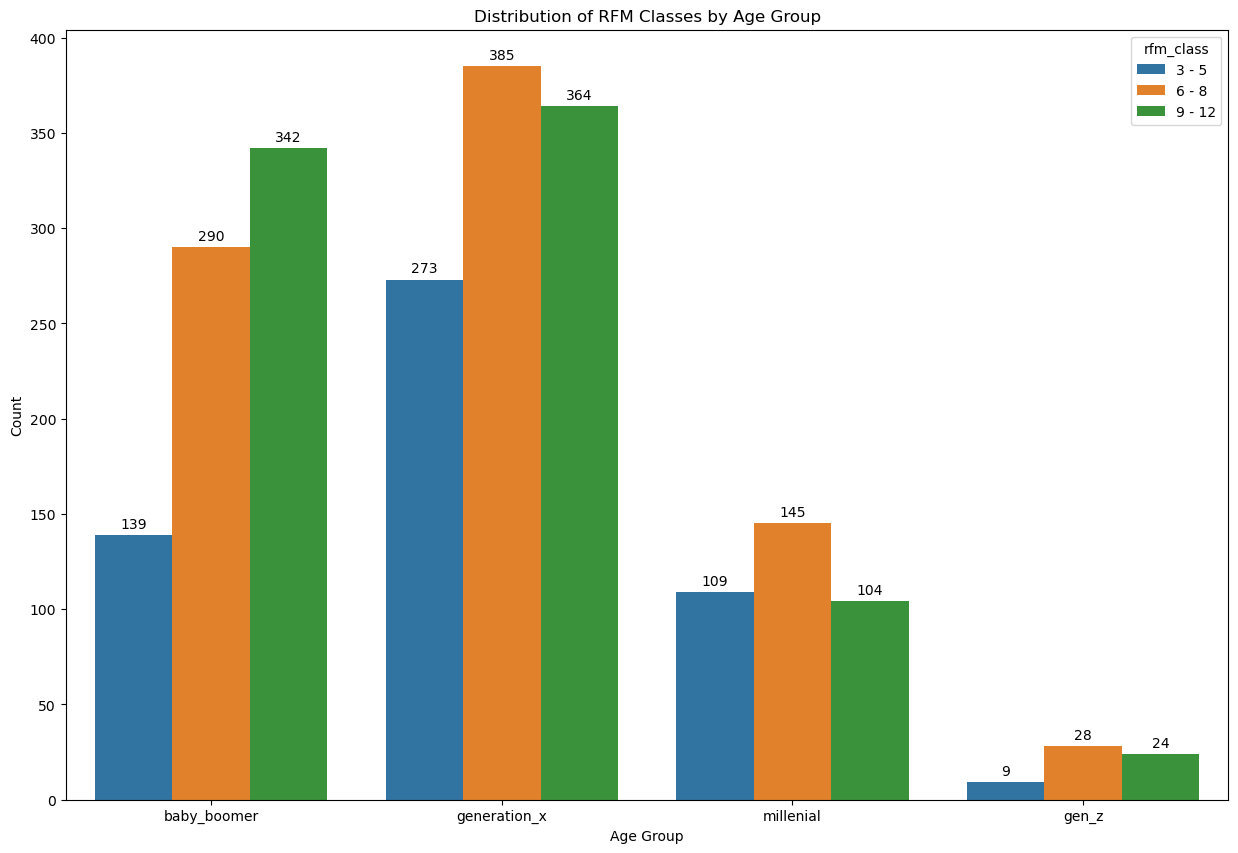

In [35]:
rfm_order = ['3 - 5', '6 - 8', '9 - 12']

# Convert the 'rfm_class' column to a categorical type with the specified order
df2['rfm_class'] = pd.Categorical(df2['rfm_class'], categories=rfm_order, ordered=True)

# Create the pivot table
pivot_table = df2.pivot_table(values='ID', index='age_group', columns='rfm_class', aggfunc='count', fill_value=0)

fig, ax = plt.subplots(figsize=(15, 10))  # Define figure and axis with specified size
sns.barplot(x='age_group', y='ID', hue='rfm_class', data=df2, estimator=len, ax=ax)

plt.title('Distribution of RFM Classes by Age Group')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

plt.ylabel('Count')
plt.xlabel('Age Group')
plt.show()


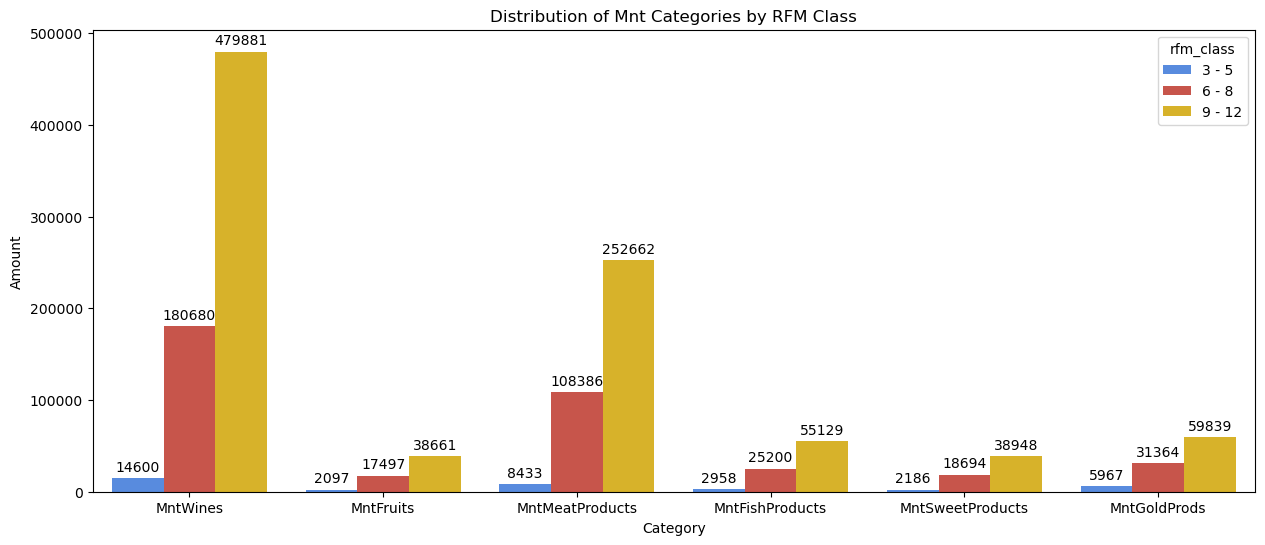

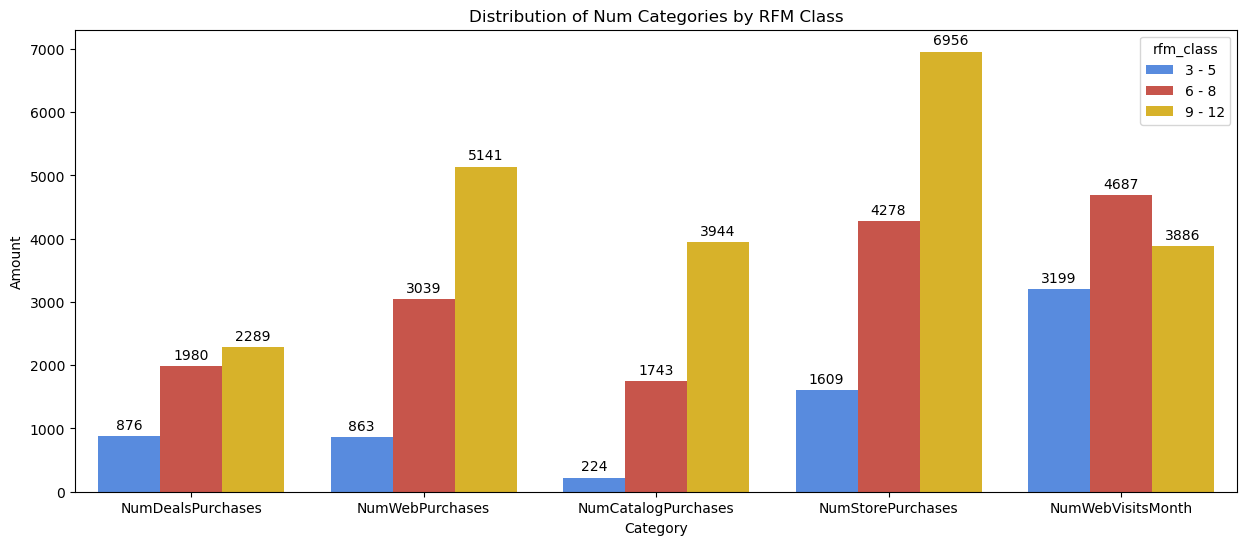

In [36]:
# Melt the DataFrame to have 'rfm_class', 'variable', and 'value' columns for 'Mnt' categories
mnt_cols = ['rfm_class', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_mnt = df2[mnt_cols].groupby('rfm_class').sum().reset_index().melt(id_vars='rfm_class', value_vars=mnt_cols[1:], var_name='category', value_name='amount')

# Melt the DataFrame to have 'rfm_class', 'variable', and 'value' columns for 'Num' categories
num_cols = ['rfm_class', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df_num = df2[num_cols].groupby('rfm_class').sum().reset_index().melt(id_vars='rfm_class', value_vars=num_cols[1:], var_name='category', value_name='amount')



# Google-like color palette
google_palette = ['#4285F4', '#DB4437', '#F4C20D', '#0F9D58']

plt.figure(figsize=(15, 6))
ax_mnt = sns.barplot(x='category', y='amount', hue='rfm_class', data=df_mnt, palette=google_palette, hue_order=['3 - 5', '6 - 8', '9 - 12'])
plt.title('Distribution of Mnt Categories by RFM Class')
plt.ylabel('Amount')
plt.xlabel('Category')

# Add numbers on top of the bars
for p in ax_mnt.patches:
    ax_mnt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

plt.show()

plt.figure(figsize=(15, 6))
ax_num = sns.barplot(x='category', y='amount', hue='rfm_class', data=df_num, palette=google_palette, hue_order=['3 - 5', '6 - 8', '9 - 12'])
plt.title('Distribution of Num Categories by RFM Class')
plt.ylabel('Amount')
plt.xlabel('Category')

# Add numbers on top of the bars
for p in ax_num.patches:
    ax_num.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

plt.show()



In [40]:
df_loyal = df2[df2['segment']=='loyal cust']

In [41]:
df_loyal.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Dt_Customer_month', 'Dt_Customer_year', 'Dt_Customer_seconds',
       'age_group', 'sum_amount', 'count_trx', 'CustomerID', 'R_quartile',
       'F_quartile', 'M_quartile', 'RFM_Segment', 'RFM_Score', 'segment',
       'spending_class', 'frequency_class', 'rfm_class'],
      dtype='object')

In [42]:
bins = [0, 15000, 30000, 50000, 100000, 160000]
labels = ['<= 15k', '>15k-30k', '>30k-50k', '>50k-100k', '>100k-160k']

# Create a new column using the pd.cut function
df_loyal['income_cateory'] =  pd.cut(df_loyal['Income'], bins=bins, labels=labels, right=False)

df_loyal = df_loyal.rename(columns={'MntWines':'wines', 'MntFruits': 'fruits', 'MntMeatProducts': 'meats', 'MntFishProducts': 'fish', 'MntSweetProducts': 'sweets', 'MntGoldProds': 'gold',\
                                    'NumDealsPurchases':'Deal Purchases', 'NumWebPurchases': 'Web Purchases', 'NumCatalogPurchases': 'Catalog Purchases', 'NumStorePurchases': 'Store Purchases',\
                                    'AcceptedCmp3': 'Campaign 3', 'AcceptedCmp4': 'Campaign 4', 'AcceptedCmp5': 'Campaign 5', 'AcceptedCmp1': 'Campaign 1','AcceptedCmp2': 'Campaign 2'})

C:\Users\DGRSZOMBIE315\AppData\Local\Temp\ipykernel_20848\3698725629.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



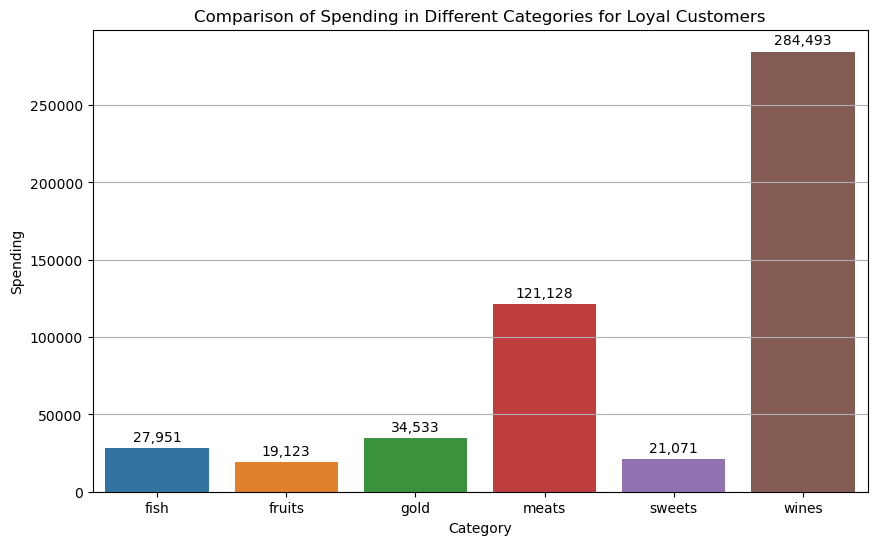

In [43]:
df_loyal_melted = df_loyal.melt(id_vars='ID', value_vars=['wines', 'fruits', 'meats', 'fish', 'sweets', 'gold'])

# Group by 'variable' and sum the 'value'
df_loyal_sum = df_loyal_melted.groupby('variable')['value'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=[10,6])
ax = sns.barplot(x='variable', y='value', data=df_loyal_sum)
plt.title('Comparison of Spending in Different Categories for Loyal Customers')
plt.xlabel('Category')
plt.ylabel('Spending')

# Remove vertical grid lines
plt.grid(axis='y', linestyle='-')

# Show the numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt= lambda x: '{:,}'.format(int(x)), padding=3)

plt.show()

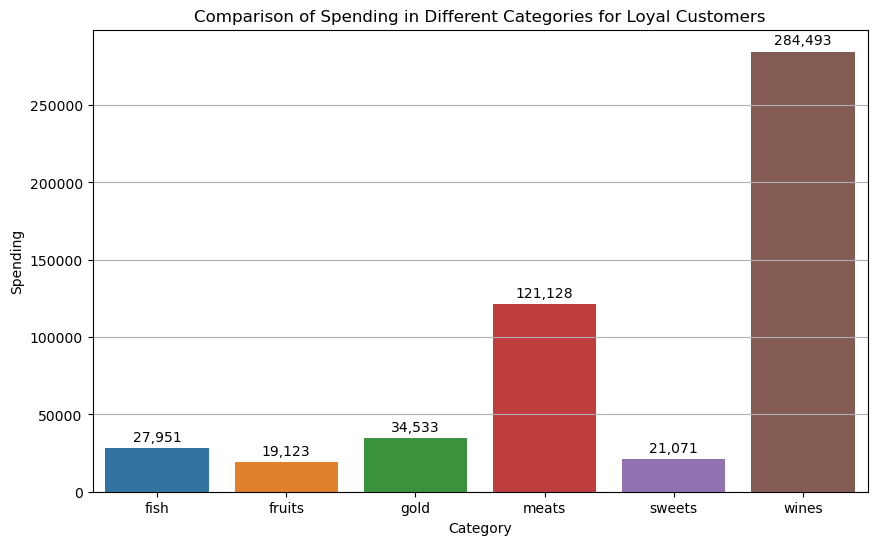

In [45]:
df_loyal_melted = df_loyal.melt(id_vars='ID', value_vars=['wines', 'fruits', 'meats', 'fish', 'sweets', 'gold'])

# Group by 'variable' and sum the 'value'
df_loyal_sum = df_loyal_melted.groupby('variable')['value'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=[10,6])
ax = sns.barplot(x='variable', y='value', data=df_loyal_sum)
plt.title('Comparison of Spending in Different Categories for Loyal Customers')
plt.xlabel('Category')
plt.ylabel('Spending')

# Remove vertical grid lines
plt.grid(axis='y', linestyle='-')

# Show the numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt= lambda x: '{:,}'.format(int(x)), padding=3)

plt.show()

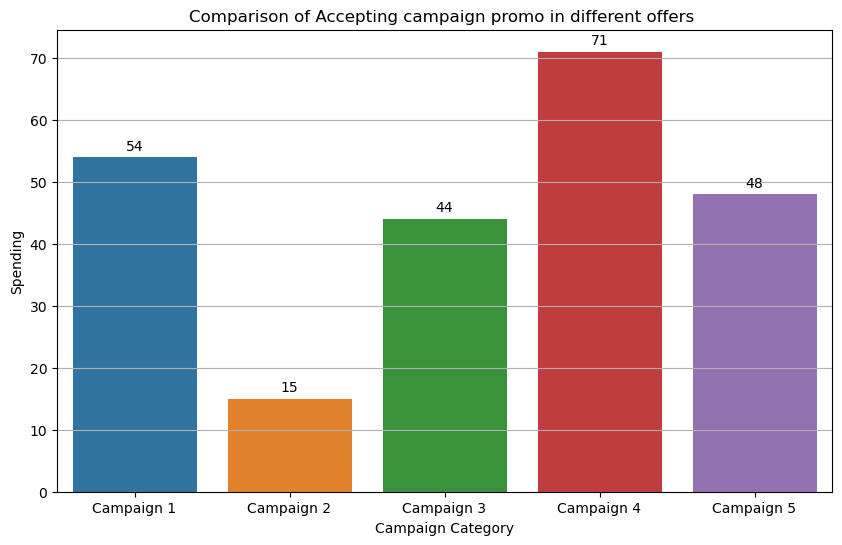

In [46]:
df_loyal_melted = df_loyal.melt(id_vars='ID', value_vars=['Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 1', 'Campaign 2'])

# Group by 'variable' and sum the 'value'
df_loyal_sum = df_loyal_melted.groupby('variable')['value'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=[10,6])
ax = sns.barplot(x='variable', y='value', data=df_loyal_sum)
plt.title('Comparison of Accepting campaign promo in different offers ')
plt.xlabel('Campaign Category')
plt.ylabel('Spending')

# Remove vertical grid lines
plt.grid(axis='y', linestyle='-')

# Show the numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt= lambda x: '{:,}'.format(int(x)), padding=3)

plt.show()

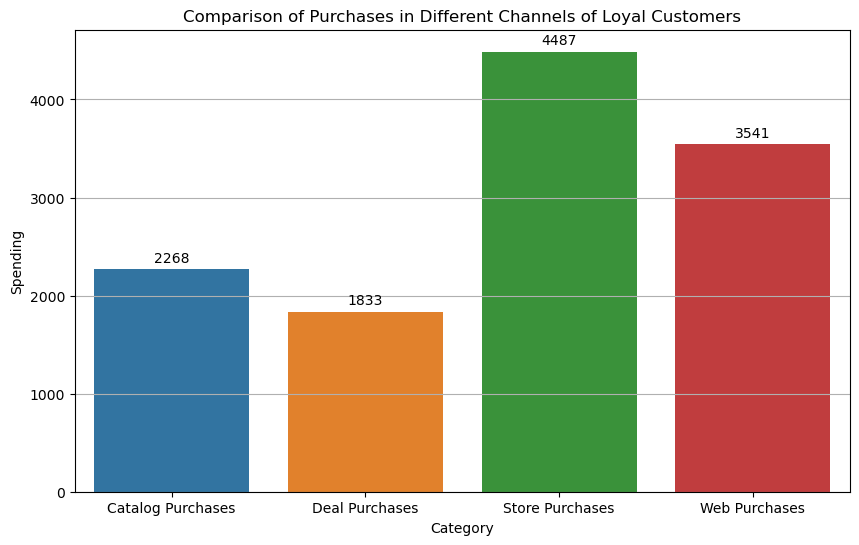

In [47]:
df_loyal_melted = df_loyal.melt(id_vars='ID', value_vars=['Web Purchases','Catalog Purchases', 'Store Purchases', 'Deal Purchases'])

# Group by 'variable' and sum the 'value'
df_loyal_sum = df_loyal_melted.groupby('variable')['value'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=[10,6])
ax = sns.barplot(x='variable', y='value', data=df_loyal_sum)
plt.title('Comparison of Purchases in Different Channels of Loyal Customers')
plt.xlabel('Category')
plt.ylabel('Spending')

# Remove vertical grid lines
plt.grid(axis='y', linestyle='-')

# Show the numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.show()